In [1]:
import axelrod as axl
import seaborn
import csv
from sklearn.linear_model import LogisticRegression
import pandas
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [26]:
alex, camille = axl.Alternator(), axl.TitForTat()
match = axl.Match([alex, camille], 10)
_ = match.play()
print(match.sparklines(c_symbol='😀', d_symbol='🎁'))

😀🎁😀🎁😀🎁😀🎁😀🎁
😀😀🎁😀🎁😀🎁😀🎁😀


In [86]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]
christmas = axl.Tournament(family, turns=50, repetitions=1)
results = christmas.play()
results.scores

[[525], [562], [417], [622], [646], [646]]

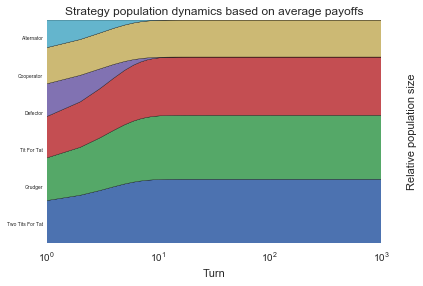

In [88]:
evo = axl.Ecosystem(results)
evo.reproduce(1000)
plot = axl.Plot(results)
p = plot.stackplot(evo);

In [36]:
p.savefig("../images/basic_christmas_evo.svg")

In [89]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]

def check_if_end_pop_cooperates(r=3,p=1,s=0,t=5, digits=5, family=family, turns=10000):
    game = axl.Game(r=r, p=p, s=s, t=t)
    christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
    results = christmas.play()
    evo = axl.Ecosystem(results)
    evo.reproduce(turns)
    last_pop = [round(pop, digits) for pop in evo.population_sizes[-1]]
    return last_pop[1] == last_pop[2] == 0, last_pop

In [90]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=5)

(True, [0.16576, 0.0, 0.0, 0.26105, 0.28659, 0.28659])

In [93]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=50)

(True, [0.0, 0.0, 0.0, 0.06083, 0.46958, 0.46958])

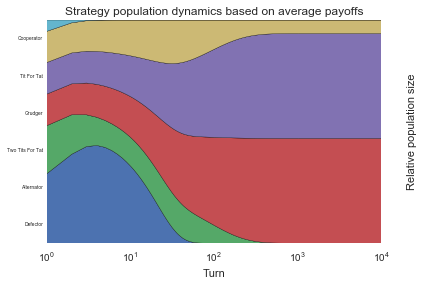

In [95]:
game = axl.Game(r=3, p=1, s=0, t=50)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_10_christmas_evo.svg")

In [96]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=500)

(False, [0.0, 1.0, 0.0, 0.0, 0.0, 0.0])

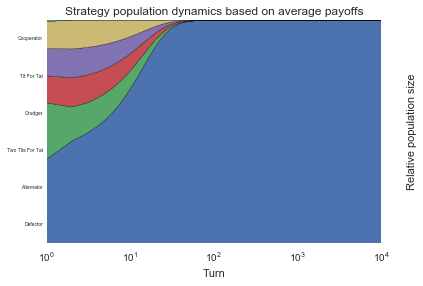

In [97]:
game = axl.Game(r=3, p=1, s=0, t=500)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_100_christmas_evo.svg")

# Logistic regression

In [3]:
df = pandas.read_csv("christmas.csv")
df.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,26.000000,26.000000,26.000000,26.000000,26,26.000000,26,26,26.000000,26.000000,26.000000
mean,4.076923,2.307692,0.576923,5.653846,1,0.127427,0,0,0.263716,0.304430,0.304430
std,0.744208,0.884047,0.702742,0.485165,0,0.059702,0,0,0.007802,0.026059,0.026059
min,3.000000,1.000000,0.000000,5.000000,True,0.039900,0,0,0.252470,0.264240,0.264240
25%,4.000000,2.000000,0.000000,5.000000,1,0.063810,0,0,0.257278,0.281858,0.281858
50%,4.000000,2.000000,0.000000,6.000000,1,0.137700,0,0,0.261475,0.300465,0.300465
75%,5.000000,3.000000,1.000000,6.000000,1,0.180375,0,0,0.271442,0.331890,0.331890
max,5.000000,4.000000,2.000000,6.000000,True,0.219050,0,0,0.275430,0.342420,0.342420


In [4]:
X = df[df.columns[:4]]
y = df["Promise"]
model = LogisticRegression()
result = model.fit(X, y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: True

In [ ]:
pandas.DataFrame(list(zip(X.columns, model.coef_[0])), columns=["Variables", "Coefficients"])